# Obsah prednasky

## Numericke atributy

> ### Normalizacia udajov

> ### Tranasformacia numerickych atributov na kategoricke

> ### Transformacia kategorickych udajov na numericke

> ### Vytvaranie atributov kombinovanim

## Vyber atributov

len uplny zaklad

## Nevyvazene datasety

Vycerpavajuci zoznam mnozstva veci, co sa da robit na pripravu dat a na feature engineering najdete tu: http://www.datasciencecentral.com/profiles/blogs/feature-engineering-data-scientist-s-secret-sauce-1

Zopar najcastejsie pouzivanych veci z toho vyberiem a ukazem na co je to dobre

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

plt.rcParams['figure.figsize'] = 6, 4
from IPython.display import Image

# Numericke atributy

In [2]:
data_file = "./data/challenge/x_train.csv"
challenge_data = pd.read_csv(data_file, nrows=1000, sep=',', header=None)
challenge_data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,2.400931,4.235430,7.147523,0.455781,-1.471710,0.368072,1.402726,3.231591,-1.111184,2.542668,...,-1.278341,0.081948,0.934971,0.988862,-2.817641,0.573825,3.931404,0.204244,10.623778,-8.322258
1,2.959725,-2.146311,1.201100,4.206000,6.006231,1.064849,-1.838940,-0.227245,-0.346572,-0.451681,...,-3.672226,-1.047564,-1.498405,-0.921323,-0.384467,-1.260944,-0.721455,3.082391,6.122824,-2.656565
2,3.543542,-0.753945,0.459010,1.193610,4.166587,1.610900,-3.181179,-0.414485,-3.642286,0.527908,...,-5.564399,-0.667491,-2.781279,0.389482,-3.455173,0.395151,1.614165,0.867497,6.588551,-6.279469
3,-2.940113,1.279881,-2.462053,-0.744649,-1.845080,-2.705489,1.125120,-0.839736,-3.896343,-1.120876,...,3.240573,-0.576021,3.706526,1.195011,-1.887120,-0.813390,-0.098769,0.525311,12.889137,-5.339454
4,6.907914,-1.035285,-1.841294,-0.060504,4.320388,2.423103,-5.194417,-0.937909,-4.159663,4.763647,...,-0.639724,1.529124,-2.930810,0.347728,-3.324413,3.475989,4.956617,0.037510,5.432440,-2.220027


In [3]:
challenge_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
0     1000 non-null float64
1     1000 non-null float64
2     1000 non-null float64
3     1000 non-null float64
4     1000 non-null float64
5     1000 non-null float64
6     1000 non-null float64
7     1000 non-null float64
8     1000 non-null float64
9     1000 non-null float64
10    1000 non-null float64
11    1000 non-null float64
12    1000 non-null float64
13    1000 non-null float64
14    1000 non-null float64
15    1000 non-null float64
16    1000 non-null float64
17    1000 non-null float64
18    1000 non-null float64
19    1000 non-null float64
20    1000 non-null float64
21    1000 non-null float64
22    1000 non-null float64
23    1000 non-null float64
24    1000 non-null float64
25    1000 non-null float64
26    1000 non-null float64
27    1000 non-null float64
28    1000 non-null float64
29    1000 non-null float64
30    1000 non-null float64
31    1000 non-null float6

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff4e2573b00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ff4df65e048>]], dtype=object)

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


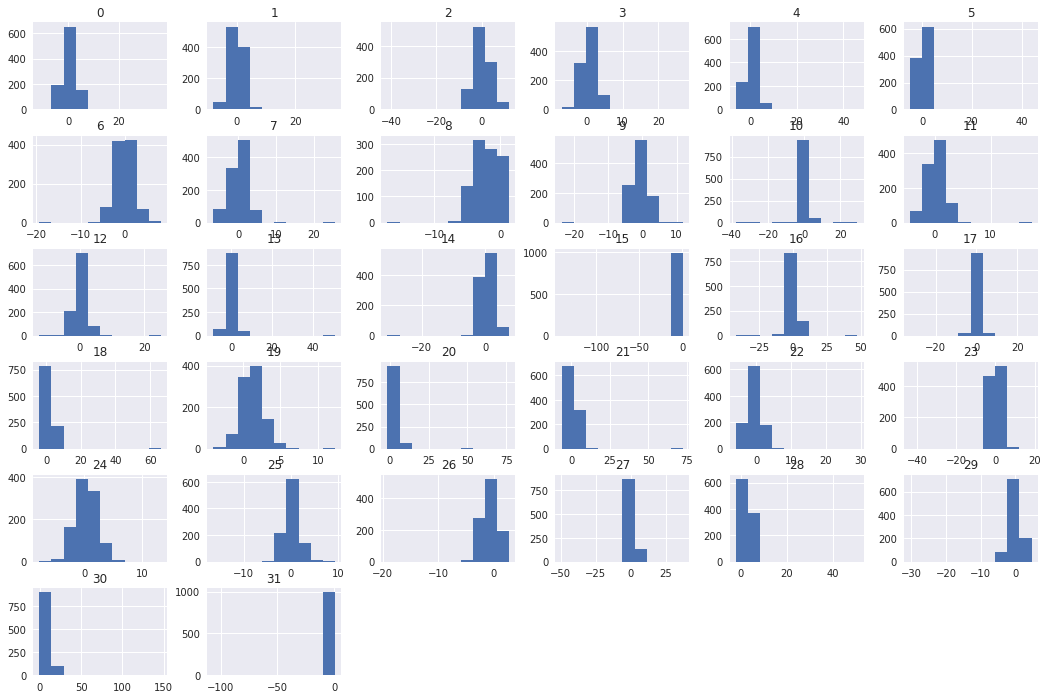

In [4]:
# seaborn.pairplot(netcla) # toto nije dobry napad. Tych atributov je strasne vela a kazdy s kazdym je dost velka matica
# plt.rcParams['figure.figsize'] = 18, 12
challenge_data.hist(figsize=(18, 12))

# Normalizacia udajov

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


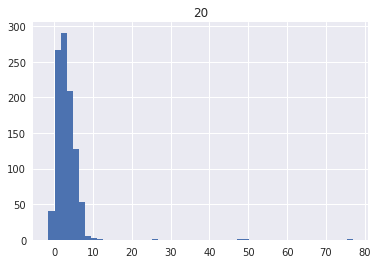

In [5]:
index = 20
pom = challenge_data[index].hist(bins=50)
pom.set_title(index)

In [6]:
from scipy.stats import boxcox 
# namiesto box-cox by sa dal pouzit logaritmus povodnej hodnoty, ale to je hack. box-cox sa dokaze postarat o to, aby sa vysledne rozelenie podobalo normalnemu

In [7]:
challenge_data[20].min()

-1.5215626955032349

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


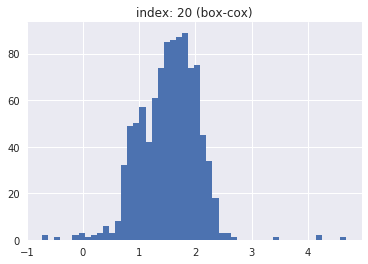

In [8]:
index = 20
transformed, att = boxcox(challenge_data[index]+2)# boxcox vrati transformovane data a parametre transformacie. Tie viem zafixovat a v tom pripade mi to vrati len transformovane data
pom = pd.Series(transformed).hist(bins=50)
pom.set_title("index: %d (box-cox)" % index)

In [11]:
# z-normalization: shift = mean, scale = std
# 0-1 normalization: shift = min, scale =  max - min
# toto iste robi StandardScaler pre vsetky atributy. Pozor ale na power law
# ak pouzijete RobustScaler, tak si viete poradit aj s outliermi (pouziva rozsah 1st quartile (25th quantile) and the 3rd quartile (75th quantile))
def normalization(data, shift, scale): 
    return (np.array(data) - float(shift))/scale

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


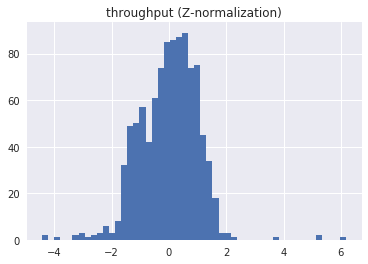

In [12]:
z_transformed = normalization(transformed, np.mean(transformed), np.std(transformed))
pom = pd.Series(z_transformed).hist(bins=50)
pom.set_title('throughput (Z-normalization)')

# Transformacia numerickych atributov na kategoricke - diskretizacia

Pre niektore algoritmy ciselne data niesu uplne vhodne. Napriklad taky Naivny Bayes potrebuje kategoricke hodnoty. Tie sa daju vytvorit zaradenim numerickych hodnot do intervalov.

Intervaly su bud manulane nastavene, alebo take, aby ich sirka bola rovnaka (Equal width binning/discretization) alebo pocty prvkov (Equal frequency binning/discretization), ktore do nich spadaju boli priblyzne rovnake. 

## Rovnaka sirka intervalov

In [13]:
bin_count = 10
bins = np.linspace(z_transformed.min(), z_transformed.max(), bin_count)
ew_digitized = np.digitize(z_transformed, bins)
ew_digitized[:10]

array([4, 4, 5, 3, 5, 4, 5, 4, 3, 4])

In [14]:
z_transformed[:10]

array([ 0.10657099,  0.16580308,  0.8440961 , -1.24717423,  0.48185395,
       -0.55594854,  0.3699829 , -0.04235558, -1.22058166, -0.61991132])

<Container object of 9 artists>

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


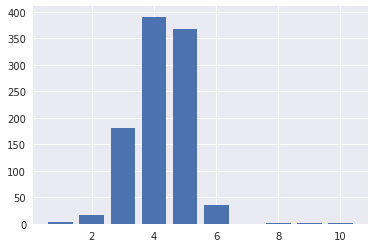

In [15]:
plt.bar(*np.unique(ew_digitized, return_counts=True))

In [16]:
bins

array([-4.42671654, -3.24692043, -2.06712432, -0.88732821,  0.29246791,
        1.47226402,  2.65206013,  3.83185624,  5.01165235,  6.19144847])

pri rovnako sirokych intervaloch som rovnomerne rozdelil intrval medzi maximalnou a minimalnou hodnotou. Nic mi nebrani definovat si vlastne, rozne siroke intervaly a spravit z toho pristup pouzivajuci manualne definovane intervaly

## Rovnaka pocetnost intervalov

Chceme, aby boli intervali priblyzne rovnako pocetne. Predpokaldajme, ze sme uz spravili nejake transformacie dat, a tie teraz priblyzne dodrzuju normalne rozdelenie

(0, 0.45)

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


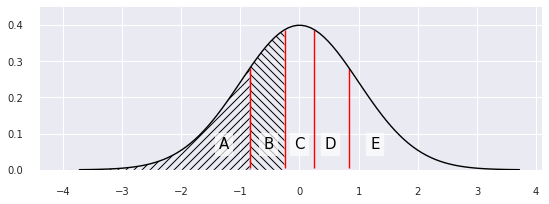

In [17]:
# toto je kod na vytvorenie fancy grafu, ktory nemusite podrobne studovat ak sa vam nechce. Dolezity je vysloedok, aby som na nom vysvetlil princip transformacie

from scipy.stats import norm

def breakpoints(alphabetSize):
        return list(map(norm.ppf, np.linspace(0,1,alphabetSize+1)[1:-1]))
    
def interval_centres(alphabetSize):
    return breakpoints(alphabetSize * 2)[::2]
    
def adjust_spines(ax, spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 10))  # outward by 10 points
            spine.set_smart_bounds(True)
        else:
            spine.set_color('none')  # don't draw spine

    # turn off ticks where there is no spine
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')
    else:
        # no yaxis ticks
        ax.yaxis.set_ticks([])

    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')
    else:
        # no xaxis ticks
        ax.xaxis.set_ticks([])

plt.rcParams['figure.figsize'] = 9, 3

fig, ax = plt.subplots(1, 1)

symbol_num = 5
brp = breakpoints(symbol_num)
centres = interval_centres(symbol_num)
lw = 1.4

plt.vlines(brp, 0.005, list(map(norm.pdf, brp)), color='red', linewidth=lw)

x = np.linspace(norm.ppf(0.0001), norm.ppf(0.9999), 100)
ax.plot(x, norm.pdf(x), '-', color='black', linewidth=lw)

hatched2 = np.linspace(-4, brp[0], 100)
ax.fill_between(hatched2, norm.pdf(hatched2), facecolor="none", hatch="///", edgecolor="black", linewidth=0.0, alpha=0.5)

hatched = np.linspace(brp[0], brp[1], 100)
ax.fill_between(hatched, norm.pdf(hatched), facecolor="none", hatch='\\\\\\', edgecolor="black", linewidth=0.0, alpha=0.5)

adjust_spines(ax, ['left', 'bottom'])
# adjust_spines(ax, ['bottom'])

letters = 'ABCDEFGHIJKLMNOPQRSTUVXYZ'
for i in range(symbol_num):
    ax.annotate(letters[i], xy=(centres[i], 0.05), horizontalalignment='center', verticalalignment='middle', backgroundcolor='w', 
                fontsize='15', color='black', bbox=dict(color='white', alpha=0.7))

ax.set_ylim([0, 0.45])

kazdy interval ma presne rovnaky obsah pod kryvkou. To znamena, ze ak podla tychto intervalov rozdelime data z normalneho rozdelenia do roznych symbolov / kategorickych hodnot, tak pocetnost kazdej z tychto hodnot bude priblyzne rovnaky

In [18]:
plt.rcParams['figure.figsize'] = 6, 4

In [20]:
def create_breakpoints(alphabetSize):
        brkp_list = list(map(norm.ppf, np.linspace(0,1,alphabetSize+1)))
        return [(brkp_list[i], brkp_list[i+1]) for i in range(alphabetSize)]
create_breakpoints(5)

[(-inf, -0.84162123357291418),
 (-0.84162123357291418, -0.25334710313579972),
 (-0.25334710313579972, 0.25334710313580006),
 (0.25334710313580006, 0.8416212335729143),
 (0.8416212335729143, inf)]

In [21]:
def interval_transform(data, breakpoints):
    def get_interval(value, breakpoints):
        for index in range(len(breakpoints)):
            breakpoint = breakpoints[index]
            if value > breakpoint[0] and value <= breakpoint[1]:
                return index
        return len(breakpoints)
    
    return pd.Series([get_interval(value, breakpoints) for value in data])

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


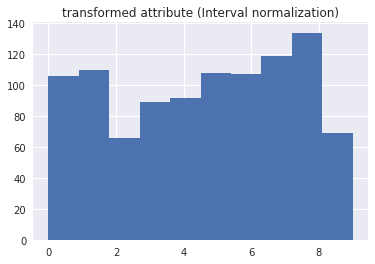

In [22]:
interval_number = 10
interval_transformed = interval_transform(z_transformed, create_breakpoints(interval_number))
pom = pd.Series(interval_transformed).hist(bins=interval_number)
pom.set_title('transformed attribute (Interval normalization)')

Kedze sme nemali uplne pekne normalne rozdelenie, tak ani intervaly niesu uplne rovnomerne pocetne, ale niesme daleko

## Nieco podobne by sa dalo dosiahnut aj pomocou percentilov v pripade ak nemame normalizovane data

Toto by sme vedeli pustat na hociake rozdelenie dat a nemuseli by sme sa spoliehat na nejake teoreticke rozdelenie, ktore by mali tie nase data splnat. A dokonca bude ten zapis aj jednoduchsi :)

In [23]:
data = challenge_data[20] # tuna nepotrebujeme transformovat data, ale ak by sme, tak nam to nijak neprekaza

bin_count = 10
percentiles = np.linspace(0, 100, bin_count, endpoint = False)
bins = list(map(lambda x: np.percentile(data, x), percentiles))
ef_digitized = np.digitize(data, bins)
ef_digitized[:10]

array([6, 6, 8, 2, 7, 3, 7, 5, 2, 3])

In [24]:
percentiles

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90.])

In [25]:
bins

[-1.5215626955032349,
 0.34819526605370321,
 0.87868000531699997,
 1.5704484939575194,
 2.1065844091655421,
 2.5926096439361568,
 3.1949773599911797,
 3.8665801048278805,
 4.6955183074762559,
 5.6787784680915134]

<Container object of 10 artists>

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


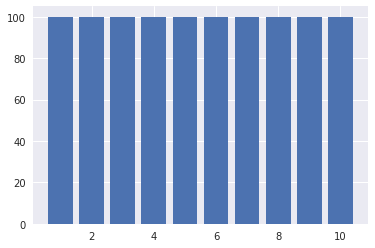

In [26]:
plt.bar(*np.unique(ef_digitized, return_counts=True))

### Co sa stane ak tu istu transformaciu pustime na testovacich datach?

<Container object of 11 artists>

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


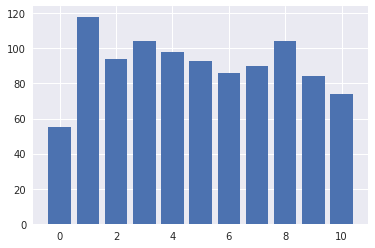

In [27]:
challenge_data_test = pd.read_csv("./data/challenge/x_test.csv", nrows=1000, sep=',', header=None)
test_data = challenge_data_test[20]

# nezmenim biny, cize pouzivam transformaciu, ktoru som natrenoval na trenovacich datach. Na toto si treba dat pozor. Nikdy transformaciu nemozem menit pre trenovacie a pre testovacie data
ef_digitized_test = np.digitize(test_data, bins)
plt.bar(*np.unique(ef_digitized_test, return_counts=True))

# Transformacia numerickych dat na binarne

toto je jednoduche, potrebujete si len zobrat nejaku hranicu a vsetko co je pod nou bude 0 a nad nou 1

In [28]:
from sklearn import preprocessing # tu je vela uzitovnych nastrojov na predpripravu dat. Dnes tento balicek budeme pouzivat vela krat

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


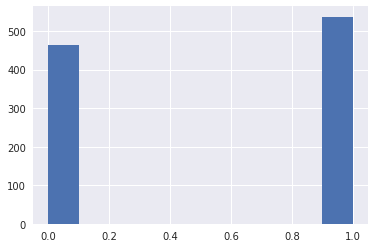

In [32]:
binarizer = preprocessing.Binarizer(0) # v tomto pripade je hranica 0
binary = binarizer.transform(z_transformed.reshape(1, -1))
pd.Series(binary[0]).hist()

# Transformacia kategorickych udajov na numericke

http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/

https://github.com/wdm0006/categorical_encoding

https://stats.idre.ucla.edu/r/library/r-library-contrast-coding-systems-for-categorical-variables/

### Existuje viacero sposobov ako transformovat kategoricku hodnotu na cislo 

1. Ordinal - priradzovanie cisel postupne roznym hodnotam
2. One-hot - z kazdej kategorie vznikne stlpec s hodnotou 1 v tych riadkoch, ktore boli nastavene na tuto hodnotu. inde 0
3. Binary - zoberie sa ordinal, zakoduju sa tie cisla ako binarne, kazda cislica binarneho cisla je pouzita ako stlpec a tam kde bola na zodpovedajucom mieste 1, tam bude v stlpci 1 a inak 0
4. Sum - porovnava sa priemer zavyslej premennej na riadokch jednej skupiny oproti priemeru zavyslej premennej na celej datovej sade
5. Helmert - velmi podobne ako Sum, len jedinecnost categorickej hodnoty je dana inou kombinaciou hodnot
6. BackwardDifferenceEncoder - velmi podobne ako Sum, len jedinecnost categorickej hodnoty je dana inou kombinaciou hodnot
7. Polynomial - trenuje koeficienty ploynomialnej regresie rozneho stupna, ktore sa daju pouzit na regresiu zavyslej premennej (neviem aky to ma zmysel pre maly pocet roznych hodnot) (treba ordinalne premenne)
8. Hash - zahashuje string kategorickej premennej a moduluje ho poctom roznych hodnot. Je v sklearn http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.FeatureHasher.html

Zaujimave su asi len prve 4 a cislo 7, ostatne su len obmeny tychto s tym, ze menia rozdelenia hodnot

In [33]:
mushrooms = pd.read_csv('data/mushrooms/agaricus-lepiota.csv', sep=',')
mushrooms.head(10)

,class,capshape,capsurface,capcolor,bruises,odor,gillattachment,gillspacing,gillsize,gillcolor,...,stalksurfacebelowring,stalkcolorabovering,stalkcolorbelowring,veiltype,veilcolor,ringnumber,ringtype,sporeprintcolor,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [34]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                    8124 non-null object
capshape                 8124 non-null object
capsurface               8124 non-null object
capcolor                 8124 non-null object
bruises                  8124 non-null object
odor                     8124 non-null object
gillattachment           8124 non-null object
gillspacing              8124 non-null object
gillsize                 8124 non-null object
gillcolor                8124 non-null object
stalkshape               8124 non-null object
stalkroot                8124 non-null object
stalksurfaceabovering    8124 non-null object
stalksurfacebelowring    8124 non-null object
stalkcolorabovering      8124 non-null object
stalkcolorbelowring      8124 non-null object
veiltype                 8124 non-null object
veilcolor                8124 non-null object
ringnumber               8124 non-null object
ringtype           

In [35]:
mushrooms.describe()

,class,capshape,capsurface,capcolor,bruises,odor,gillattachment,gillspacing,gillsize,gillcolor,...,stalksurfacebelowring,stalkcolorabovering,stalkcolorbelowring,veiltype,veilcolor,ringnumber,ringtype,sporeprintcolor,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [36]:
def get_mushroom_data(df):
    """
    rozdelenie na data a triedy. Zakodovanie tried na cisla
    """
    X = df.reindex(columns=[x for x in df.columns.values if x != 'class'])
    y = df.reindex(columns=['class'])
    y = preprocessing.LabelEncoder().fit_transform(y.values.reshape(-1, ))

    return X, y

In [37]:
X, y = get_mushroom_data(mushrooms) # X obsahuje vsetky atributy okrem triedy, y obsahuje stlpec class zakodovany na cisla

In [38]:
y # kedze sme mali len 2 triedy, tak tam mame len hodnoty 0 a 1

array([1, 0, 0, ..., 0, 1, 0])

In [40]:
X.head()

,capshape,capsurface,capcolor,bruises,odor,gillattachment,gillspacing,gillsize,gillcolor,stalkshape,...,stalksurfacebelowring,stalkcolorabovering,stalkcolorbelowring,veiltype,veilcolor,ringnumber,ringtype,sporeprintcolor,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [41]:
# pip install category_encoders
import category_encoders as ce

In [57]:
#encoder = ce.OrdinalEncoder()
#encoder = ce.BinaryEncoder()
encoder = ce.PolynomialEncoder() 
# encoder = ce.HashingEncoder()

# encoder = ce.HelmertEncoder()
#encoder = ce.OneHotEncoder() # tento je aj v sklearn.preprocessing.OneHotEncoder, tu su ale vsetky a maju rovnaky predpis
# encoder = ce.BackwardDifferenceEncoder()
# encoder = ce.SumEncoder()



In [58]:
X_cleaned = encoder.fit_transform(X)
X_cleaned.head(5)

,col_capshape_0,col_capshape_1,col_capshape_2,col_capshape_3,col_capshape_4,col_capshape_5,col_capsurface_0,col_capsurface_1,col_capsurface_2,col_capsurface_3,...,col_population_3,col_population_4,col_population_5,col_habitat_0,col_habitat_1,col_habitat_2,col_habitat_3,col_habitat_4,col_habitat_5,col_habitat_6
0,1.0,-0.597614,0.545545,-0.372678,0.188982,-0.062994,1.0,-0.670820,0.5,-0.223607,...,-0.372678,0.188982,-0.062994,1.0,-0.566947,5.455447e-01,-0.408248,0.241747,-0.109109,0.032898
1,1.0,-0.597614,0.545545,-0.372678,0.188982,-0.062994,1.0,-0.670820,0.5,-0.223607,...,0.521749,-0.566947,0.314970,1.0,-0.377964,-1.110223e-16,0.408248,-0.564076,0.436436,-0.197386
2,1.0,-0.358569,-0.109109,0.521749,-0.566947,0.314970,1.0,-0.670820,0.5,-0.223607,...,0.521749,-0.566947,0.314970,1.0,-0.188982,-3.273268e-01,0.408248,0.080582,-0.545545,0.493464
3,1.0,-0.597614,0.545545,-0.372678,0.188982,-0.062994,1.0,-0.223607,-0.5,0.670820,...,-0.372678,0.188982,-0.062994,1.0,-0.566947,5.455447e-01,-0.408248,0.241747,-0.109109,0.032898
4,1.0,-0.597614,0.545545,-0.372678,0.188982,-0.062994,1.0,-0.670820,0.5,-0.223607,...,0.298142,0.377964,-0.629941,1.0,-0.377964,-1.110223e-16,0.408248,-0.564076,0.436436,-0.197386


In [56]:
encoder = ce.SumEncoder()
encoder.fit(X, y*3+1) # nemam peknu target value, tak ju trochu ozvlastnim a pozriem sa, ci to zmenilo vytvorene stlpce. 
# Hlavne pristupy zalozene na priemeroch by malo
X_cleaned = encoder.transform(X)
# X_cleaned = encoder.fit_transform(X) 
X_cleaned.head(10)

,col_capshape_0,col_capshape_1,col_capshape_2,col_capshape_3,col_capshape_4,col_capshape_5,col_capsurface_0,col_capsurface_1,col_capsurface_2,col_capsurface_3,...,col_population_3,col_population_4,col_population_5,col_habitat_0,col_habitat_1,col_habitat_2,col_habitat_3,col_habitat_4,col_habitat_5,col_habitat_6
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
6,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
8,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
9,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [59]:
set(X_cleaned.col_capshape_2)

{-0.43643578047198484,
 -0.43643578047198472,
 -0.10910894511799629,
 -0.10910894511799613,
 0.54554472558998102}

In [60]:
set(mushrooms.capshape)

{'b', 'c', 'f', 'k', 's', 'x'}

In [61]:
titanic = pd.read_csv('data/titanic/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
encoder = ce.OneHotEncoder()

In [66]:
titanic_X = titanic.dropna().reindex(columns=[x for x in titanic.columns.values if x != 'Survived'])
titanic_y = titanic.dropna().reindex(columns=['Survived'])

In [67]:
encoder.fit(titanic_X, titanic_X.Fare)
titanic_categorical = encoder.transform(titanic_X)
titanic_categorical.head()

,Name_0,Name_1,Name_2,Name_3,Name_4,Name_5,Name_6,Name_7,Name_8,Name_9,...,Embarked_0,Embarked_1,Embarked_2,Embarked_-1,PassengerId,Pclass,Age,SibSp,Parch,Fare
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,2,1,38.0,1,0,71.2833
3,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,4,1,35.0,1,0,53.1000
6,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,7,1,54.0,0,0,51.8625
10,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,11,3,4.0,1,1,16.7000
11,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,12,1,58.0,0,0,26.5500


toto sme asi uplne nechceli. Treba si davat pozor na to kolko roznych hodnot ma kategoricka premenna. Tu sme sa pokusili zakodovat meno, ktore ma velmi vela hodnot a teda nam vzniklo velmi vela roznych stlpcov. Vo vseobecnosti to nieje dobry napad

## Entity embeddings

Dalsi sposob, ktory sa pouziva na kodovanie kategorickych hodnot je pouzivanie tzv. embeddingov. Je to pomerne novy a este nie velmi casto pouzivany sposob, ale ma celkom zaujimave vlastnosti. Kodovanie zrt totiz odraza semanticke vztahy medzi kategorickymi hodnotami. 

Reprezentacia sa trenuje pomocou neuronovej siete a kazdy atribut je reprezentovany vektorom, kde rozne hodnoty tohto vektoru reprezentuju rozne hodnotyu kategorickej premennej.

* [Zdrojovy kod](https://github.com/entron/entity-embedding-rossmann)
* [Clanok](https://arxiv.org/abs/1604.06737)

# Vytvaranie atributov kombinovanim

### Polynomialne kombinovanie

In [68]:
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [69]:
poly = preprocessing.PolynomialFeatures(3)
poly.fit_transform(X) # vytvorenie polynomialnych kombinacii

array([[   1.,    0.,    1.,    0.,    0.,    1.,    0.,    0.,    0.,
           1.],
       [   1.,    2.,    3.,    4.,    6.,    9.,    8.,   12.,   18.,
          27.],
       [   1.,    4.,    5.,   16.,   20.,   25.,   64.,   80.,  100.,
         125.]])

In [70]:
# nevieme pouzivat prazdne hodnoty pri vypocte polynomialnych vlastnosti
titanic_X = titanic.dropna().reindex(columns=[x for x in titanic.columns.values if x != 'Survived']).reset_index(drop=True)
titanic_y = titanic.dropna().reindex(columns=['Survived']).reset_index(drop=True)

In [71]:
poly = preprocessing.PolynomialFeatures(2) # pozor na prilis velke cislo. Vela atributov a pretrenovanie
# polynomial_titanic = poly.fit_transform(titanic_X)
polynomial_titanic = poly.fit_transform(titanic_X._get_numeric_data())

In [72]:
polynomial = pd.DataFrame(polynomial_titanic)
polynomial.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.0,2.0,1.0,38.0,1.0,0.0,71.2833,4.0,2.0,76.0,...,1444.0,38.0,0.0,2708.7654,1.0,0.0,71.2833,0.0,0.0,5081.308859
1,1.0,4.0,1.0,35.0,1.0,0.0,53.1000,16.0,4.0,140.0,...,1225.0,35.0,0.0,1858.5000,1.0,0.0,53.1000,0.0,0.0,2819.610000
2,1.0,7.0,1.0,54.0,0.0,0.0,51.8625,49.0,7.0,378.0,...,2916.0,0.0,0.0,2800.5750,0.0,0.0,0.0000,0.0,0.0,2689.718906
3,1.0,11.0,3.0,4.0,1.0,1.0,16.7000,121.0,33.0,44.0,...,16.0,4.0,4.0,66.8000,1.0,1.0,16.7000,1.0,16.7,278.890000
4,1.0,12.0,1.0,58.0,0.0,0.0,26.5500,144.0,12.0,696.0,...,3364.0,0.0,0.0,1539.9000,0.0,0.0,0.0000,0.0,0.0,704.902500


In [73]:
titanic_X._get_numeric_data().head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,2,1,38.0,1,0,71.2833
1,4,1,35.0,1,0,53.1000
2,7,1,54.0,0,0,51.8625
3,11,3,4.0,1,1,16.7000
4,12,1,58.0,0,0,26.5500


ak by ste chceli zachovat rozumne nazvy stlpcov: http://stackoverflow.com/questions/36728287/sklearn-preprocessing-polynomialfeatures-how-to-keep-column-names-headers-of

In [74]:
polynomial['Survived'] = titanic_y
polynomial.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,Survived
0,1.0,2.0,1.0,38.0,1.0,0.0,71.2833,4.0,2.0,76.0,...,38.0,0.0,2708.7654,1.0,0.0,71.2833,0.0,0.0,5081.308859,1
1,1.0,4.0,1.0,35.0,1.0,0.0,53.1000,16.0,4.0,140.0,...,35.0,0.0,1858.5000,1.0,0.0,53.1000,0.0,0.0,2819.610000,1
2,1.0,7.0,1.0,54.0,0.0,0.0,51.8625,49.0,7.0,378.0,...,0.0,0.0,2800.5750,0.0,0.0,0.0000,0.0,0.0,2689.718906,0
3,1.0,11.0,3.0,4.0,1.0,1.0,16.7000,121.0,33.0,44.0,...,4.0,4.0,66.8000,1.0,1.0,16.7000,1.0,16.7,278.890000,1
4,1.0,12.0,1.0,58.0,0.0,0.0,26.5500,144.0,12.0,696.0,...,0.0,0.0,1539.9000,0.0,0.0,0.0000,0.0,0.0,704.902500,1


In [75]:
from sklearn.model_selection import cross_val_score
# clf = LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5)

cross_validation_results = cross_val_score(clf, polynomial[polynomial.columns[polynomial.columns != 'Survived']], polynomial['Survived'], cv=6)
(cross_validation_results.mean(), cross_validation_results.std())

(0.59050179211469533, 0.099112368149885902)

In [76]:
cross_validation_results

array([ 0.41935484,  0.58064516,  0.70967742,  0.7       ,  0.53333333,
        0.6       ])

In [77]:
original = titanic.dropna()._get_numeric_data()
original.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
1,2,1,1,38.0,1,0,71.2833
3,4,1,1,35.0,1,0,53.1000
6,7,0,1,54.0,0,0,51.8625
10,11,1,3,4.0,1,1,16.7000
11,12,1,1,58.0,0,0,26.5500


In [80]:
len(original)

183

In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5)


cross_validation_results = cross_val_score(clf, original[original.columns[original.columns != 'Survived']], original['Survived'], cv=6)
(cross_validation_results.mean(), cross_validation_results.std())

(0.49982078853046596, 0.17466132230853632)

### Kombinovanie numerickych a kategorickych dat

In [81]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
mean_age = titanic.Age.mean()
mean_age

29.69911764705882

In [83]:
titanic['mean_age_diff'] = pd.Series('', index=titanic.index)
titanic[['mean_age_diff']] = titanic.Age.apply(lambda x: x-mean_age)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,mean_age_diff
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,-7.699118
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,8.300882
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,-3.699118
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,5.300882
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,5.300882


In [84]:
mean_attributes_by_sex = titanic.groupby('Sex').mean()
# mean_attributes_by_sex.loc['female','Age']
mean_attributes_by_sex

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,mean_age_diff
Sex,,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,-1.783409
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,1.027527


In [85]:
titanic['mean_age_diff_per_sex'] = pd.Series('', index=titanic.index)
titanic[['mean_age_diff_per_sex']] = titanic.apply(lambda x: x['Age']-mean_attributes_by_sex.loc[x['Sex'],'Age'], axis=1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,mean_age_diff,mean_age_diff_per_sex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,-7.699118,-8.726645
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,8.300882,10.084291
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,-3.699118,-1.915709
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,5.300882,7.084291
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,5.300882,4.273355


In [86]:
combined = titanic.dropna()._get_numeric_data()
combined.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,mean_age_diff,mean_age_diff_per_sex
1,2,1,1,38.0,1,0,71.2833,8.300882,10.084291
3,4,1,1,35.0,1,0,53.1000,5.300882,7.084291
6,7,0,1,54.0,0,0,51.8625,24.300882,23.273355
10,11,1,3,4.0,1,1,16.7000,-25.699118,-23.915709
11,12,1,1,58.0,0,0,26.5500,28.300882,30.084291


# Varovanie k vyrabaniu a transformacii atributov

* Ked budete robit hociake operacie nad datami, tak si dajte pozor aby ste robili rovnake operacie nad trenovacou aj testovacou sadou (transformacie atributov, vytvaranie novych, filtrovanie ...)
* Dajte si pozor aby vam do trenovania nepretiekli udaje z buducnosti
> * ked idem napriklad normalizovat nieco priemerom, tak hodnotu priemeru pocitam len nad trenovacimi datami a nie nad vsetkymi 
> * Pri tomto vedia velmi pomoct tzv. Pipeliny
>> http://zacstewart.com/2014/08/05/pipelines-of-featureunions-of-pipelines.html

* ked budete normalizovat udaje, tak na normalizovanie testovacej vzorky pouzite koeficienty z trenovacej vzorky

# Vyber atributov

pozor, toto je nieco ine ako redukcia dimenzionality. Ak by ale niekoho zaujimalo aj to, tak tu je celkom fajn tutorial https://github.com/jakevdp/sklearn_pycon2015/blob/master/notebooks/04.1-Dimensionality-PCA.ipynb

kopec pristupov v scikite uz naimplementovanych je: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection

# Existuje viacero deleni pristupov
Velmi pekny prehlad je na Wikipedii https://en.wikipedia.org/wiki/Feature_selection

Samostatny notebook k feature selection: https://ganimedes.fiit.stuba.sk/hub/user/jakub.sevcech/notebooks/school_other/vos-2017/Feature%20selection.ipynb

## Zakladne je podla toho ci je to zavisle na modely

1. filter - vyber atributov bez ohladu na model. Atributy, ktore najlepsie opisuju strukturu (napr. PCA)
2. wrapper - opakovane trenovanie modelu na roznych podmnozinach atributov a hladanie najlepsej kombinacie (greedy forward selection, greedy backward elimination, exhaustive, PSO, Simulated annealing ...)
3. embedded - model ma vlastny mechanizmus na najdenie najlepsich atributov a ten pouziva (napr. Random forest)

# Priklad rekurzivneho vyberu atributov
toto vam uz spominal Robo
http://scikit-learn.org/stable/modules/feature_selection.html

toto je priklad pouzitia pre regresiu. Je ale v podstatne jedno ci ide o klasifikaciu alebo regresiu
https://gallery.cortanaintelligence.com/Notebook/Variable-Selection-in-Azure-ML-Jupyter-Notebook-4

# Vyber atributov pomocou nahodnych lesov

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier # tu sa da pouzit aj random forrest
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
iris = load_iris()
X, y = iris.data, iris.target
X.shape

In [ ]:
clf = ExtraTreesClassifier()
clf = clf.fit(X, y)
clf.feature_importances_  

In [ ]:
pd.Series(clf.feature_importances_).plot(kind='bar')

In [ ]:
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape 

velmi obsirny priklad: https://github.com/ogrisel/notebooks/blob/master/Adjusted%20Variable%20Importances%20with%20Randomized%20Trees.ipynb

# Nevyvazene datasety

existuje viacero sposobov na to aby sme riesili nevyvazenost dat. napriklad undersampling, oversampling, vahovanie, nastavovanie thresholdu pravdepodobnosti, kde sa priradi trieda, zbieranim dalsich dat, plakanim (len tento posledny v skutocnosti tento problem neriesi)

zaujimava kniznica s mnozstvom implementovanych sposobov na undersampling a oversampling. 
https://github.com/scikit-learn-contrib/imbalanced-learn

Niesu tam priklady priamo na klasifikaciu, ale je tu nejaky priklad, kde vizualizuju rozne sposoby under/over samplingu
http://contrib.scikit-learn.org/imbalanced-learn/stable/auto_examples/index.html

Tu je pekny priklad ako sa daju znevyhodnit triedy nastavovanim thrasholdu, kde sa predikcia povazuje za jednu triedu a kedy za inu
http://www.bigdataexaminer.com/2016/01/29/dealing-with-unbalanced-class-svm-random-forest-and-decision-tree-in-python/

## Preco je nevyvazenost problem?

In [ ]:
wine_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

In [ ]:
Y = wine_df.quality.values
wine_df = wine_df.drop('quality', axis=1)
Y = np.asarray([1 if i >= 7 else 0 for i in Y])
wine_df.head()

In [ ]:
X = wine_df.as_matrix()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)
tree.score(X_test, y_test)     

In [ ]:
from sklearn.dummy import DummyClassifier
    
dummy = DummyClassifier(strategy='constant', constant=0).fit(X_train, y_train)
dummy.score(X_test, y_test)     

In [ ]:
len_y = len(y_test)
temp_1 = len(list(filter(lambda x: x==0, y_test)))

percentage = float(temp_1) / float(len_y)

print(percentage)

Problem je v tom, ze tie data su nevyvazene a aj v metrike, ktoru sme pouzivali. Predvolena je metrika je accuracy.

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test, tree.predict(X_test))

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test, dummy.predict(X_test))

## Nastavovanie rozhodovacej hranice

jeden sposob ako nastavovat klasifikatory aby vedeli pracovat s nevyvazenymi triedami je pouzivat threshold na pravdepodobnost, ze sa nejaka trieda prehlasi za predikovanu

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=15)
clf.fit(X,Y)
(clf.predict_proba(X)[:,1] > 0.5).astype(int) # pozor, teraz robim velku chybu. aku?
# (clf.predict_proba(X)[:,1] > 0.7).astype(int).sum()

In [ ]:
(clf.predict_proba(X)[:,1] > 0.7).astype(int).sum()

In [ ]:
set(clf.predict_proba(X)[:,1])

skusme teraz najst thrashold, kde je najlepsia uspesnost. Mohli by sme pouzit nejaky gradient descent, ale my sme lenivi, tak skusime skusat rozne moznosti na nejakom intervale

In [ ]:
import sklearn

def cutoff_predict(clf, X, cutoff):
    return (clf.predict_proba(X)[:,1] > cutoff).astype(int)

scores = []

def custom_f1(cutoff): # kto mal FLP? Co je toto za konstrukcia?
    def f1_cutoff(clf, X, y):
        ypred = cutoff_predict(clf, X, cutoff)
        return sklearn.metrics.f1_score(y, ypred)
    
    return f1_cutoff

for cutoff in np.arange(0.1, 0.9, 0.1):
    clf = RandomForestClassifier(n_estimators=15)
    validated = cross_val_score(clf, X, Y, cv=10, scoring = custom_f1(cutoff))
    scores.append(validated)

In [ ]:
seaborn.boxplot(pd.DataFrame(np.array(scores).T, columns=np.arange(0.1,0.9,0.1)))
plt.xlabel('cutoff value')
plt.ylabel('custom F1 score')

takze teraz vieme povedat, ze ked pouzujeme cutoff 0.2-0.3, tak vieme penalizovat trochu jednu triedu. Cize s nizsou pravdepodobnostou budeme brat tu konkretnu triedu a teda budeme trochu riesit nevybalancovanost

## Nastavenie vah klasifikatoru

priklad prebraty a upraveny z http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane_unbalanced.html

In [ ]:
rng = np.random.RandomState(0)
n_samples_1 = 1000
n_samples_2 = 100
X = np.r_[1.5 * rng.randn(n_samples_1, 2),
          0.5 * rng.randn(n_samples_2, 2) + [2, 2]]
y = [0] * (n_samples_1) + [1] * (n_samples_2)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.legend()

In [ ]:
from sklearn import svm

In [ ]:
# fit the model and get the separating hyperplane
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.legend()

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# get the separating hyperplane
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
a = ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

In [ ]:
# fit the model and get the separating hyperplane
wclf = svm.SVC(kernel='linear', class_weight={1: 100})
wclf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.legend()

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# get the separating hyperplane
Z = wclf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins for weighted classes
b = ax.contour(XX, YY, Z, colors='r', levels=[0], alpha=0.5, linestyles=['-'])

In [ ]:
# fit the model and get the separating hyperplane
bclf = svm.SVC(kernel='linear', class_weight='balanced')
bclf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.legend()

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# get the separating hyperplane
Z = bclf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins for weighted classes
c = ax.contour(XX, YY, Z, colors='g', levels=[0], alpha=0.5, linestyles=['-'])

In [ ]:
# fit models
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, y)

wclf = svm.SVC(kernel='linear', class_weight={1: 100})
wclf.fit(X, y)

bclf = svm.SVC(kernel='linear', class_weight='balanced')
bclf.fit(X, y)

# plot separating hyperplanes and samples
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.legend()

# plot the decision functions for both classifiers
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# get the separating hyperplane
Z = clf.decision_function(xy).reshape(XX.shape)
a = ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

# get the separating hyperplane for weighted classes
Z = wclf.decision_function(xy).reshape(XX.shape)
b = ax.contour(XX, YY, Z, colors='r', levels=[0], alpha=0.5, linestyles=['-'])

# get the separating hyperplane
Z = bclf.decision_function(xy).reshape(XX.shape)
c = ax.contour(XX, YY, Z, colors='g', levels=[0], alpha=0.5, linestyles=['-'])

plt.legend([a.collections[0], b.collections[0], c.collections[0]], ["non weighted", "weighted", "balanced"],
           loc="upper right")

## Undersampling

http://contrib.scikit-learn.org/imbalanced-learn/stable/auto_examples/under-sampling/plot_comparison_under_sampling.html#sphx-glr-auto-examples-under-sampling-plot-comparison-under-sampling-py

Njacastejsie pouzivane ja ** random undersampling **

## Oversampling

http://contrib.scikit-learn.org/imbalanced-learn/stable/auto_examples/over-sampling/plot_comparison_over_sampling.html#sphx-glr-auto-examples-over-sampling-plot-comparison-over-sampling-py

najcastejsie pouzivane je ** random oversampling **